# PCA
## Marcin Biela, 302959


The goal of this excercise is to calculate the number of principal components while maintaining the tradeoff between computational power and classifier accuracy.
Run the task on one of the databases available in Python

In [1207]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [1208]:
boston = load_boston()
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(*, return_X_y=False)
    DEPRECATED: `load_boston` is deprecated in 1.0 and will be removed in 1.2.
    
    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.
    
    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.
    
    In this special case, you can fetch the dataset from the original
    source::
    
        import pandas as pd
        import numpy as np
    
    
        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]
    
    Alternative datasets include the California hou

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [1209]:
data_boston = pd.DataFrame(boston.data)

In [1210]:
data_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [1211]:
list(data_boston.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [1212]:
data_boston.columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'm', 'class']
data_boston.dropna(how="all", inplace=True) # drops the empty line at file-end
data_boston.isna().value_counts()

a      b      c      d      e      f      g      h      i      j      k      m      class
False  False  False  False  False  False  False  False  False  False  False  False  False    506
dtype: int64

In [1213]:
# split data table into data X and class labels y
X = data_boston.iloc[:,0:12].values
y = data_boston.iloc[:,12].values


In [1214]:
X.shape

(506, 12)

In [1215]:
y.shape

(506,)

Visualization

Standarize

In [1217]:
# Standarized data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [1218]:
# Split on train, test subdataset
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25)

Covariance Matrix

In [1219]:
print('NumPy covariance matrix: \n%s' %np.cov(X_train.T))

NumPy covariance matrix: 
[[ 1.11933947 -0.23204755  0.44622606 -0.06443832  0.46296379 -0.23783322
   0.38736327 -0.41400719  0.66841434  0.62335721  0.33159128 -0.34216065]
 [-0.23204755  1.06660372 -0.57109978 -0.00954222 -0.55974193  0.3672542
  -0.59574055  0.67374593 -0.36372861 -0.34713774 -0.4832063   0.17853818]
 [ 0.44622606 -0.57109978  0.97706978  0.03516674  0.77657255 -0.40075453
   0.66437599 -0.70987236  0.6550096   0.74706509  0.43208467 -0.3386342 ]
 [-0.06443832 -0.00954222  0.03516674  0.92367814  0.05657278  0.14729788
   0.05369656 -0.07470487 -0.0093134  -0.04111685 -0.09005276  0.06418118]
 [ 0.46296379 -0.55974193  0.77657255  0.05657278  1.02240047 -0.32952388
   0.77561926 -0.7927592   0.64120929  0.68475214  0.24083851 -0.36121348]
 [-0.23783322  0.3672542  -0.40075453  0.14729788 -0.32952388  1.06101168
  -0.25911233  0.21500814 -0.24384022 -0.31318142 -0.40940087  0.1287212 ]
 [ 0.38736327 -0.59574055  0.66437599  0.05369656  0.77561926 -0.25911233
   1.04

Calculated Eigvalues

In [1220]:
cov_mat = np.cov(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n', eig_vecs)
print('\nEigenvalues \n', eig_vals)


Eigenvectors 
 [[-0.27254029 -0.39538483  0.21897757  0.03183583 -0.03265429  0.05710671
   0.07736334  0.14951532  0.00723864  0.744218   -0.36542633  0.01764393]
 [ 0.28142187 -0.36951558  0.34283174 -0.01328409  0.08359675 -0.09341111
  -0.28155046  0.27667003 -0.53208869 -0.31933445 -0.24589866 -0.22239574]
 [-0.35687296  0.0968503  -0.00391366 -0.00326376  0.24332128 -0.09617277
   0.46115296  0.6962131   0.13020003 -0.26442091 -0.03611702 -0.09608146]
 [ 0.00370473  0.35656864  0.34592359  0.72740945 -0.0342142  -0.00670193
   0.00525246 -0.03474991 -0.01894942  0.13257473  0.11961453 -0.43515974]
 [-0.35692389  0.21811134  0.14650595 -0.19524605 -0.01414003  0.77828691
  -0.31791929  0.02707072  0.00875237 -0.14605264 -0.13606503 -0.13337973]
 [ 0.18756327  0.10772028  0.61072468  0.02992623 -0.02880094  0.14152022
   0.09682348  0.15276197  0.01811393 -0.0024445   0.24809451  0.68108934]
 [-0.3271659   0.33613117  0.0485598  -0.15406764  0.03020148 -0.1243188
   0.33965121 -0.3

In [1221]:
# raw data
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n', eig_vecs)
print('\nEigenvalues \n', eig_vals)


Eigenvectors 
 [[ 0.26303573  0.33499954 -0.22216362 -0.04760923 -0.01954359  0.21667145
  -0.8047068   0.04914508 -0.09725495  0.07830195  0.01715246  0.23191277]
 [-0.27157898  0.33116274 -0.35510778 -0.07571346 -0.18082944  0.35277337
   0.27833007 -0.07962937  0.07698277 -0.33689655  0.52577982  0.21889537]
 [ 0.36476491 -0.10536968  0.04367192 -0.02038592 -0.08189962  0.11023429
   0.30969307 -0.24978635  0.10359191  0.38777124 -0.08595837  0.71265149]
 [ 0.01026531 -0.43736579 -0.36598217 -0.7906868  -0.13835192 -0.15301763
  -0.07150522  0.03516218  0.00564935 -0.00838938  0.01725679 -0.01311922]
 [ 0.36152254 -0.20485062 -0.12552736  0.14680532 -0.13237507  0.18916277
   0.17179928  0.04540071 -0.80562019 -0.22737    -0.00449331 -0.06637495]
 [-0.17935188 -0.10018556 -0.55620827  0.2225715   0.69824157 -0.21625236
   0.04577876  0.03421896 -0.12680593  0.10633813  0.00306823  0.18417404]
 [ 0.32697721 -0.30891141  0.00550371  0.17645195  0.06524033  0.04871534
  -0.08211411 -0.

Sort eigenvalues in a decreasing order 

In [1222]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.584980482878857
1.4287233408850606
1.181387274552588
0.8569720315866262
0.7224430956954037
0.6539927933042465
0.5318852646090326
0.3443612554274313
0.27078536693013466
0.19127322682750528
0.16953605863147653
0.06365980867164231


In [1223]:
# Cumsum of var_exp
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(var_exp)
print(cum_var_exp)


[46.54150402399046, 11.906027840708834, 9.844893954604897, 7.141433596555216, 6.020359130795028, 5.449939944202053, 4.43237720507527, 2.8696771285619267, 2.2565447244177883, 1.5939435568958766, 1.4128004885956373, 0.5304984055970191]
[ 46.54150402  58.44753186  68.29242582  75.43385942  81.45421855
  86.90415849  91.3365357   94.20621282  96.46275755  98.05670111
  99.46950159 100.        ]


 Plot the variance coeficients corresponding to eigenvalues

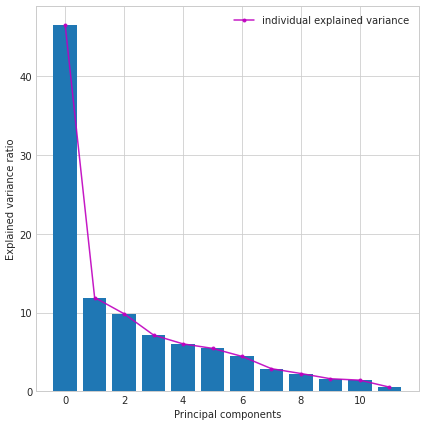

In [1224]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    plt.bar(range(12), var_exp)
    plt.plot(var_exp, '.-m',alpha=0.9,
            label='individual explained variance')
    # plt.step(range(12), cum_var_exp, where='mid',
    #          label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


6. Choose k biggest eigenvectors based on corresponding eigenvalues

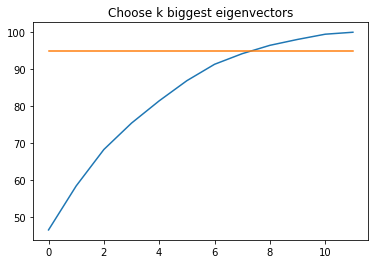

In [1225]:
plt.figure()
plt.plot(np.arange(len(cum_var_exp)), cum_var_exp)
plt.plot(np.arange(len(cum_var_exp)), 95*np.ones(cum_var_exp.shape))
plt.title("Choose k biggest eigenvectors")
plt.show()

# k = 8

## Task 2
### USArrests dataset

In [1226]:
# Imports
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [1227]:
df = pd.read_csv("usarrests.csv", index_col=0)

In [1228]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [1230]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [1231]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [1232]:
# Scaled data
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [1233]:
#  using PCA function to compute the loading vectors:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [1234]:
# Fit PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996



Explained variance:  [2.53085875 1.00996444 0.36383998 0.17696948]

Explained variance ratio:  [0.62006039 0.24744129 0.0891408  0.04335752]


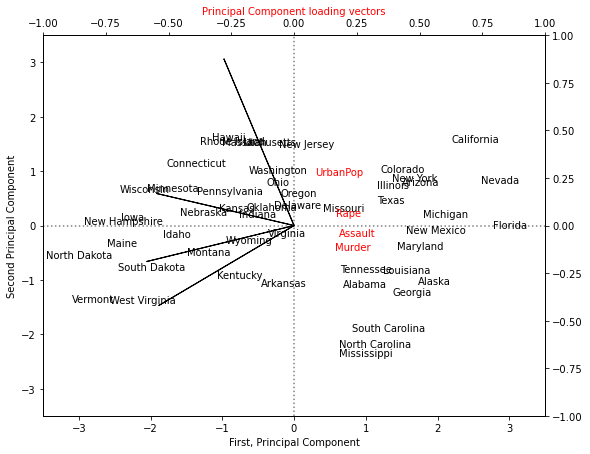

In [1235]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)

for idx in df_plot.index:
    ax.annotate(idx, (df_plot.PC1.loc[idx], -df_plot.PC2.loc[idx]), ha='center')

ax.hlines(0, -3.5, 3.5, linestyles='dotted', color='grey')
ax.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')

ax.set_xlabel("First, Principal Component")
ax.set_ylabel("Second Principal Component")

# plot principal component loading vectors using second y-axis
ax2 = ax.twinx().twiny()

ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.set_xlabel("Principal Component loading vectors", color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text
a = 1.07
for idx in pca_loadings[['V1', 'V2']].index:
    ax.annotate(idx, (pca_loadings.V1.loc[idx]*a, -pca_loadings.V2.loc[idx]*a), color="red")


# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0],-pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1],-pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2],-pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3],-pca_loadings.V2[3])


print('\nExplained variance: ', pca.explained_variance_)
print('\nExplained variance ratio: ', pca.explained_variance_ratio_)

([<matplotlib.axis.XTick at 0x1d71204b2e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

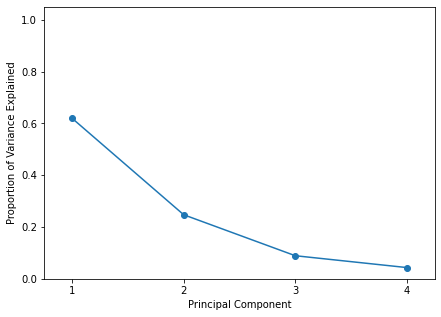

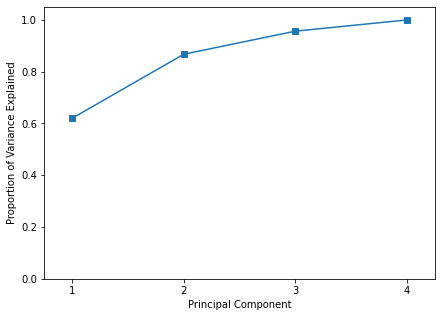

In [1236]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_,'-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_),'-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

### NCI60 Dataset

In [1237]:
df2 = pd.read_csv('nci60.csv')
df2.columns = [str(i) for i in range(df2.columns.size)] # np.arange(df2.columns.size)
# df2.drop(labels="0", axis=1)
del df2['0']
df2.head()



,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [1238]:
# Read in the labels to check out work later
y = pd.read_csv("nci60_y.csv", usecols=[1], skiprows=1, names=['type'])

In [1239]:
# Scale data
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [1240]:
# Fit PCA model and transform X to get principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

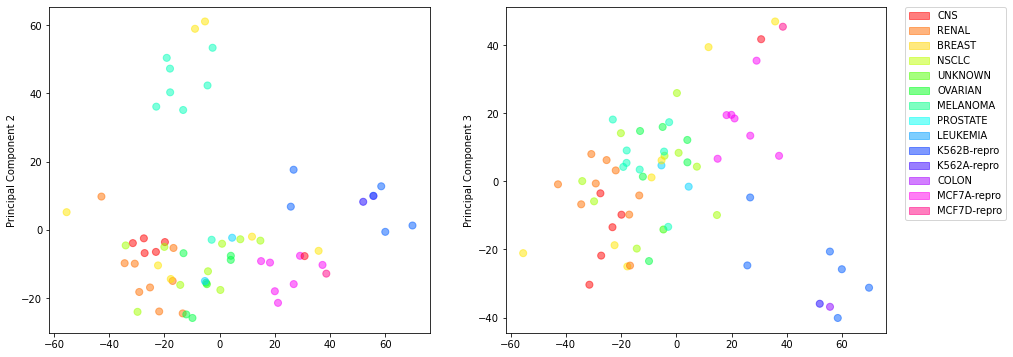

In [1241]:
fit, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:, 0], df2_plot.iloc[:, 1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could 
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [1242]:
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(), pca2.explained_variance_ratio_[:5], 
        np.cumsum(pca2.explained_variance_ratio_[:5])], 
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'], 
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])


,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0.5, 0, 'Principal components')

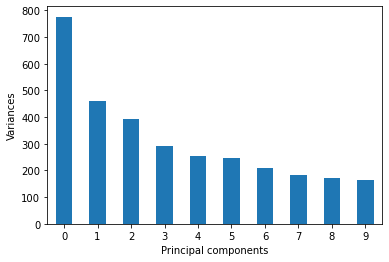

In [1243]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')
plt.xlabel('Principal components')

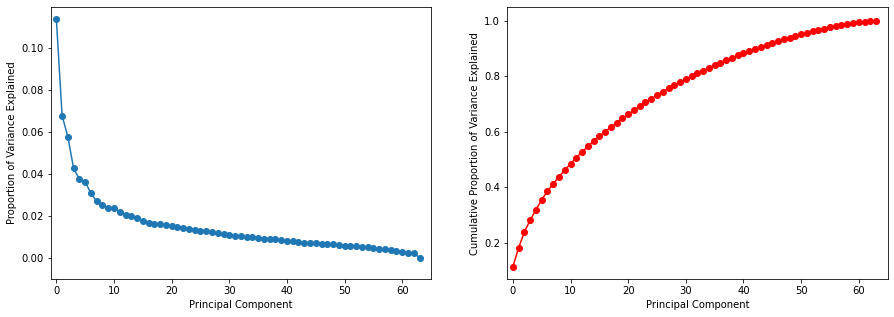

In [1244]:
# plot of the PVE of each principal component
fig , (ax1,ax2)=plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_,'-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_),'-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)